# Import the libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Import dataset

In [2]:
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Exploratory data analysis

In [3]:
df_corr = df.corr()

<AxesSubplot:>

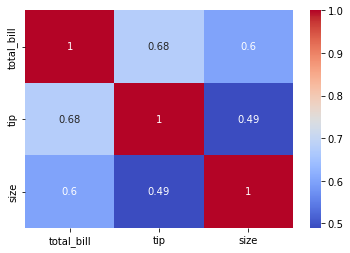

In [4]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

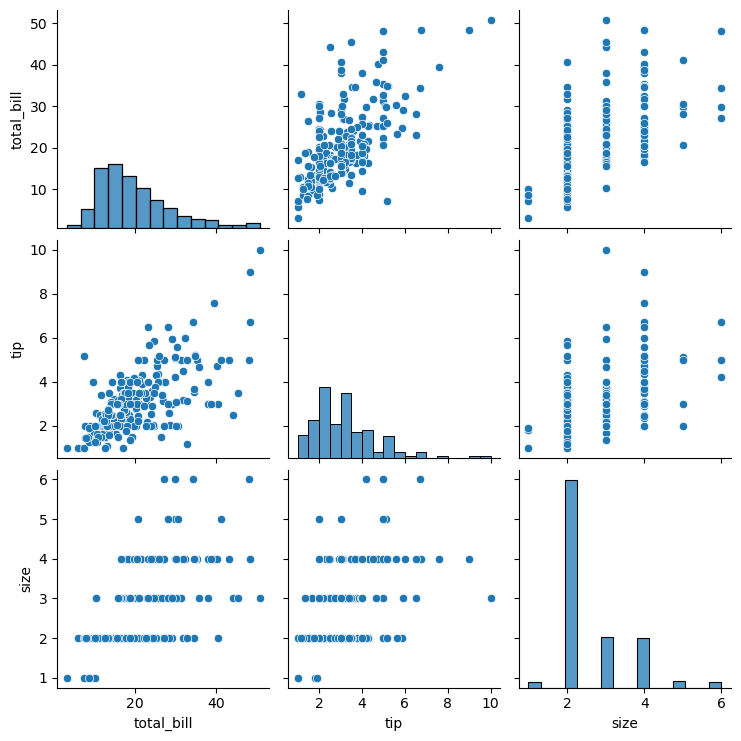

In [4]:
sns.pairplot(df)

In [5]:
# Convert non-numeric data using one-hot encoding
df = pd.get_dummies(df, columns=['time', 'day', 'smoker', 'sex'])
df.head()

,total_bill,tip,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,sex_Female,sex_Male
0,16.99,1.01,2,1,0,0,0,1,0,1,0,1,0
1,10.34,1.66,3,1,0,0,0,1,0,1,0,0,1
2,21.01,3.50,3,1,0,0,0,1,0,1,0,0,1
3,23.68,3.31,2,1,0,0,0,1,0,1,0,0,1
4,24.59,3.61,4,1,0,0,0,1,0,1,0,1,0


In [6]:
df_corr = df.corr()
df_corr

,total_bill,tip,size,time_Dinner,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,sex_Female,sex_Male
total_bill,1.000000,0.675734,0.598315,0.183118,-0.183118,-0.086168,0.054919,0.122953,-0.138174,-0.085721,0.085721,-0.144877,0.144877
tip,0.675734,1.000000,0.489299,0.121629,-0.121629,-0.055463,-0.002790,0.125114,-0.095879,-0.005929,0.005929,-0.088862,0.088862
size,0.598315,0.489299,1.000000,0.103411,-0.103411,-0.142184,-0.041121,0.193054,-0.072598,0.133178,-0.133178,-0.086195,0.086195
time_Dinner,0.183118,0.121629,0.103411,1.000000,-1.000000,-0.058159,0.462709,0.418071,-0.917996,-0.054921,0.054921,-0.205231,0.205231
time_Lunch,-0.183118,-0.121629,-0.103411,-1.000000,1.000000,0.058159,-0.462709,-0.418071,0.917996,0.054921,-0.054921,0.205231,-0.205231
day_Fri,-0.086168,-0.055463,-0.142184,-0.058159,0.058159,1.000000,-0.216319,-0.195451,-0.169608,-0.244316,0.244316,0.071060,-0.071060
day_Sat,0.054919,-0.002790,-0.041121,0.462709,-0.462709,-0.216319,1.000000,-0.500682,-0.434480,-0.155744,0.155744,-0.053957,0.053957
day_Sun,0.122953,0.125114,0.193054,0.418071,-0.418071,-0.195451,-0.500682,1.000000,-0.392566,0.181624,-0.181624,-0.168106,0.168106
day_Thur,-0.138174,-0.095879,-0.072598,-0.917996,0.917996,-0.169608,-0.434480,-0.392566,1.000000,0.128534,-0.128534,0.194445,-0.194445
smoker_No,-0.085721,-0.005929,0.133178,-0.054921,0.054921,-0.244316,-0.155744,0.181624,0.128534,1.000000,-1.000000,0.002816,-0.002816


# Split the dataset

In [7]:
X = df.drop(['tip', 'smoker_Yes', 'smoker_No'], axis=1)
y = df['tip']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Create and train the model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.intercept_

0.6833930813765718

In [12]:
model.coef_

array([ 0.08543655,  0.25978318, -0.18062723,  0.18062723, -0.04931572,
        0.06283329,  0.13424065, -0.14775822,  0.03755059, -0.03755059])

In [13]:
# Validate the model
mae_train = mean_absolute_error(y_train, model.predict(X_train))
print("Training set Mean Absolute Error: %.2f" % mae_train)

mae_test = mean_absolute_error(y_test, model.predict(X_test))
print("Test set Mean Absolute Error: %.2f" % mae_test)

Training set Mean Absolute Error: 0.76
Test set Mean Absolute Error: 0.71
